In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import scipy
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

In [2]:
FILE_PATH = 'data/pilot.json'
all_entries = []
with open(FILE_PATH) as file:
    for line in file:
        entry = json.loads(line)
        all_entries.append(entry)
len(all_entries)

86

In [3]:
#sequential, instant conditions
seq_start, ins_start = [], []
seq_finish, ins_finish = [], []

for entry in all_entries:  
    if isinstance(entry['data'], dict):
        condition = entry['data']['conditionNumber']
        #starts[condition].append(entry)
    else:
        condition = entry['data'][0]['conditionNumber']          
        if condition == 'sequential':
            seq_finish.append(entry)
        else:
            ins_finish.append(entry)


In [10]:
#calculate aha and warm ratings

seq_aha = [] #final ratings for the last anagram
seq_warm = [[] for i in range(7)]
for entry in seq_finish:
    entry_data = entry['data']
    for i in range(7): #warm ratings here 4,6,8, 10, 12, 14, 16
            r = entry_data[2*(i+2)]['responses'] #get people's aha rating here
            seq_warm[i].append(int(r[6]))
    r = entry_data[17]['responses'] #get people's aha rating here
    seq_aha.append(int(r[6]))

ins_aha = []
ins_warm = [[] for i in range(7)]
for entry in ins_finish:
    entry_data = entry['data']
    for i in range(7): #warm ratings here 4,6,8, 10, 12, 14, 16
            r = entry_data[2*(i+2)]['responses'] #get people's aha rating here
            ins_warm[i].append(int(r[6]))
    r = entry_data[17]['responses'] #get people's aha rating here    
    ins_aha.append(int(r[6]))

a = np.asarray(seq_warm[6])-np.asarray(seq_warm[5])
b = seq_aha
c = np.asarray(ins_warm[6])-np.asarray(ins_warm[5])
d = ins_aha
#print(b)
#print(d)
print(seq_warm[6])
print(seq_warm[4])
print(ins_warm[6])
print(ins_warm[5])
#np.corrcoef(a,b)
#np.corrcoef(c,d)
#print(np.asarray(ins_warm[6])-np.asarray(ins_warm[5]))
#print(ins_aha)

[9, 1, 9, 9, 9, 9, 9, 9, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9]
[9, 1, 9, 0, 0, 2, 9, 0, 0, 0, 9, 3, 7, 1, 2, 9, 6, 2]
[8, 9, 9, 7, 9, 9, 9, 9, 9, 0, 9, 9, 9, 9, 9, 6, 9, 9, 9, 9, 1, 9, 8, 9]
[1, 0, 9, 1, 1, 1, 9, 0, 9, 0, 1, 4, 0, 9, 0, 1, 2, 1, 0, 4, 0, 0, 2, 1]


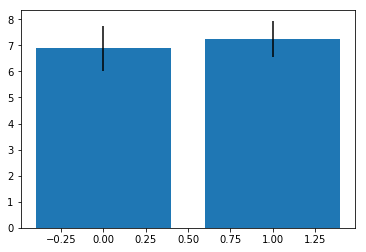

In [6]:
seq_aha_mean = np.mean(seq_aha)
seq_aha_error = stats.sem(seq_aha)
ins_aha_mean = np.mean(ins_aha)
ins_aha_error = stats.sem(ins_aha)

plt.bar(
    np.arange(2),
    [seq_aha_mean, ins_aha_mean],
    yerr=[seq_aha_error, ins_aha_error]
)

plt.show()


In [7]:
print('SEQUENTIAL')
for i in range(7):
    print(np.mean(seq_warm[i])) 
    
print('INSTANT')
for i in range(7):
    print(np.mean(ins_warm[i])) 

SEQUENTIAL
1.33333333333
1.38888888889
1.94444444444
3.38888888889
3.83333333333
4.72222222222
8.33333333333
INSTANT
1.45833333333
1.58333333333
1.83333333333
2.04166666667
2.79166666667
2.33333333333
8.0


{"q0":"rots"}
sort
